##National Names

In [1]:
%matplotlib inline

import pandas as pd
import matplotlib.pyplot as plt

pd.set_option('display.mpl_style', 'default') #Make the graphs a bit prettier
plt.rcParams['figure.figsize'] = (15, 5)

In [46]:
national_df = pd.read_csv('data/NationalNames.csv')

In [3]:
print national_df.head(10)
print national_df.shape

   Id       Name  Year Gender  Count
0   1       Mary  1880      F   7065
1   2       Anna  1880      F   2604
2   3       Emma  1880      F   2003
3   4  Elizabeth  1880      F   1939
4   5     Minnie  1880      F   1746
5   6   Margaret  1880      F   1578
6   7        Ida  1880      F   1472
7   8      Alice  1880      F   1414
8   9     Bertha  1880      F   1320
9  10      Sarah  1880      F   1288
(1825433, 5)


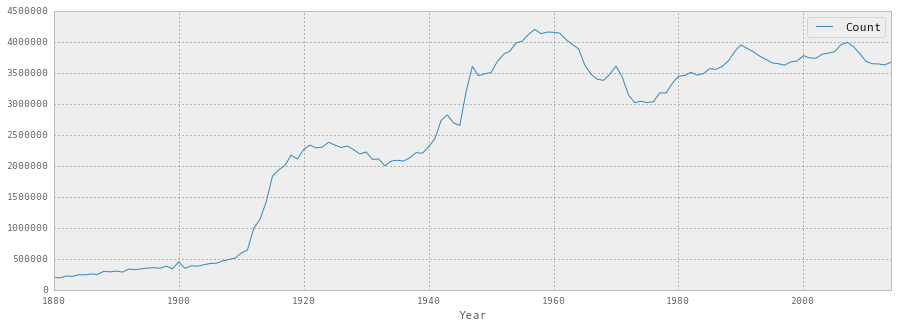

In [4]:
births = national_df[['Year', 'Count']].groupby('Year').sum()
births.plot()

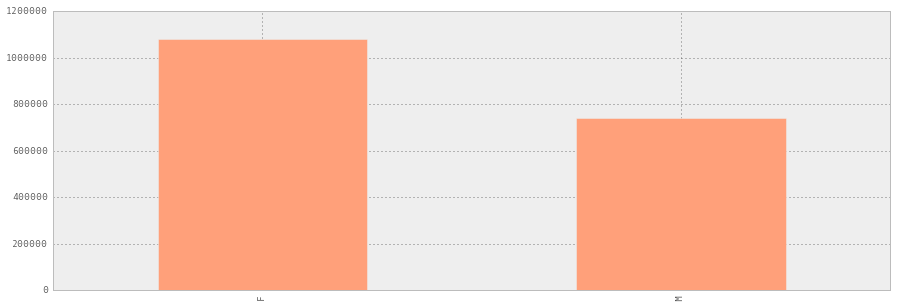

In [5]:
national_df['Gender'].value_counts().plot(kind='bar', color='lightsalmon')

In [6]:
f_national_df = national_df[national_df['Gender'] == "F"]
m_national_df = national_df[national_df['Gender'] == "M"]

print f_national_df.shape
print m_national_df.shape

(1081683, 5)
(743750, 5)


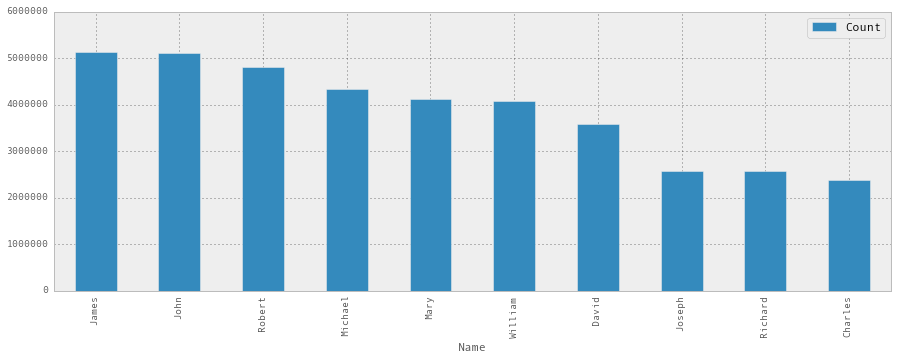

In [7]:
# top ten names 
freq = (national_df.groupby('Name')
             .agg({'Count': 'sum'})  
             .sort_values('Count', ascending=False))
freq[['Count']].head(10).plot(kind='bar')

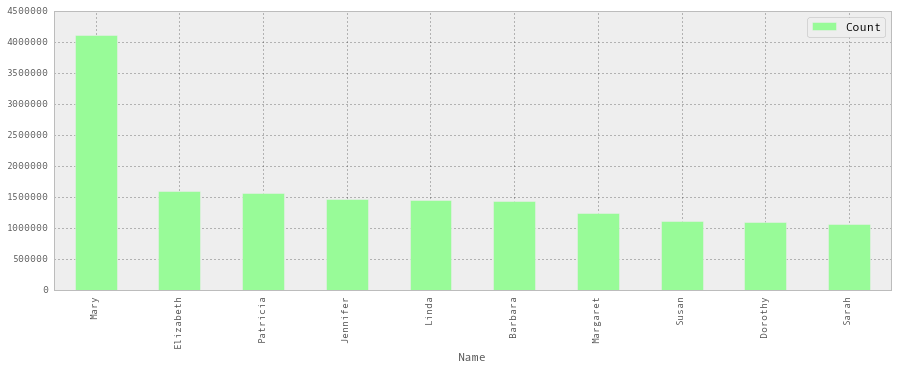

In [8]:
# top ten names for female 
freq_female = (f_national_df.groupby('Name')
             .agg({'Count': 'sum'})
             .sort_values('Count', ascending=False))
freq_female[['Count']].head(10).plot(kind='bar', color='palegreen')

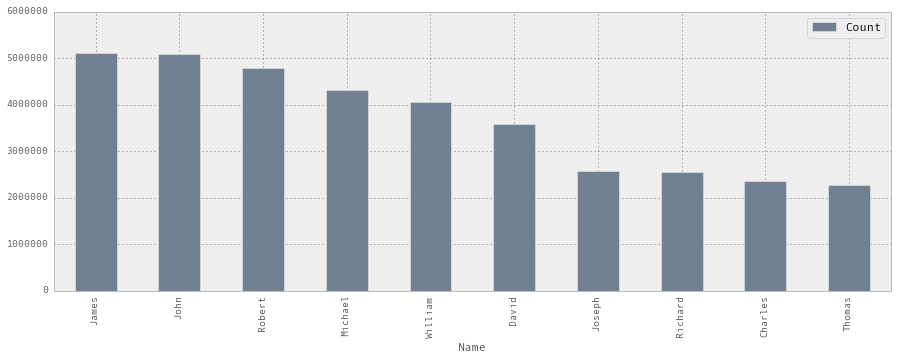

In [9]:
# top ten names for male 
freq_male = (m_national_df.groupby('Name')
             .agg({'Count': 'sum'}) 
             .sort_values('Count', ascending=False))
freq_male[['Count']].head(10).plot(kind='bar', color='slategray')

In [10]:
print freq.query('Count < 100').tail()
print freq_male.query('Count < 100').tail()
print freq_female.query('Count < 100').tail()

          Count
Name           
Florisel      5
Florrine      5
Seaanna       5
Flosie        5
Zzyzx         5
          Count
Name           
Brindin       5
Shamaree      5
Kyrek         5
Brink         5
Zzyzx         5
           Count
Name            
Renasha        5
Charlisia      5
Javis          5
Renah          5
Fathma         5


          Count
Name           
Marilyn  369380


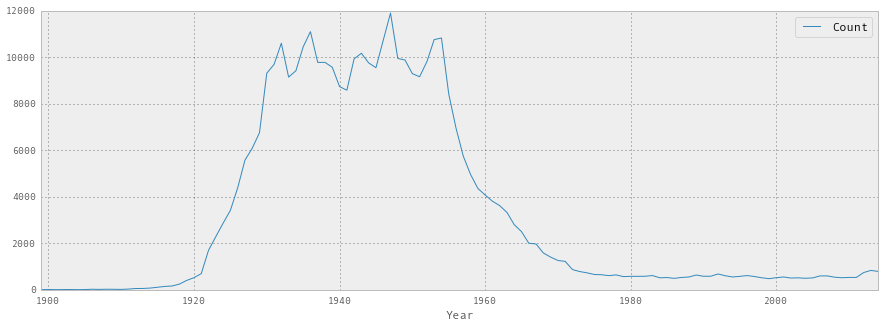

In [11]:
print freq.query('Name == "Marilyn"')
national_df.query('Name=="Marilyn"')[['Year', 'Count']].groupby('Year').sum().plot()

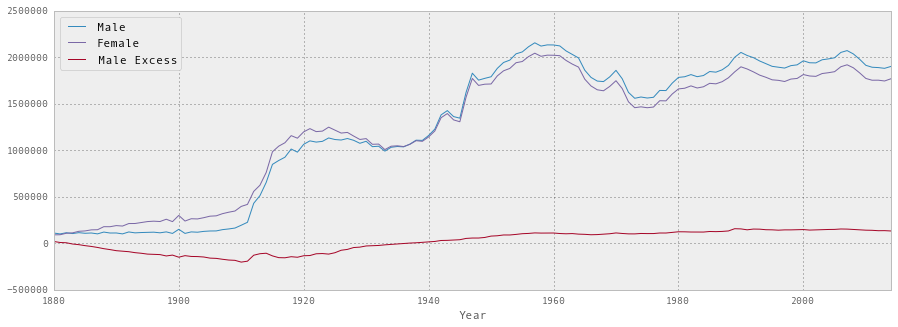

In [12]:
# Gender trend

tmp = national_df.groupby(['Gender', 'Year']).agg({'Count': 'sum'}).reset_index()

male = (tmp.query("Gender == 'M'")
        .set_index("Year").sort_index()
        .rename(columns={'Count': 'Male'}))

female = (tmp.query("Gender == 'F'")
          .set_index("Year").sort_index()
          .rename(columns={'Count': 'Female'}))

join = male[['Male']].join(female[['Female']], how='outer')
join['Male Excess'] = join['Male'] - join['Female']
join.plot()

         Frequency  FemalePercent  MalePercent
Name                                          
Willie      593888      24.605481    75.394519
Kelly       550441      85.245467    14.754533
Terry       518241      18.689760    81.310240
Jordan      479434      26.470797    73.529203
Taylor      416096      74.052622    25.947378
Alexis      388463      84.517702    15.482298
Leslie      376587      70.117662    29.882338
Jamie       350262      75.896900    24.103100
Shannon     345939      85.058638    14.941362
Robin       332662      86.765546    13.234454


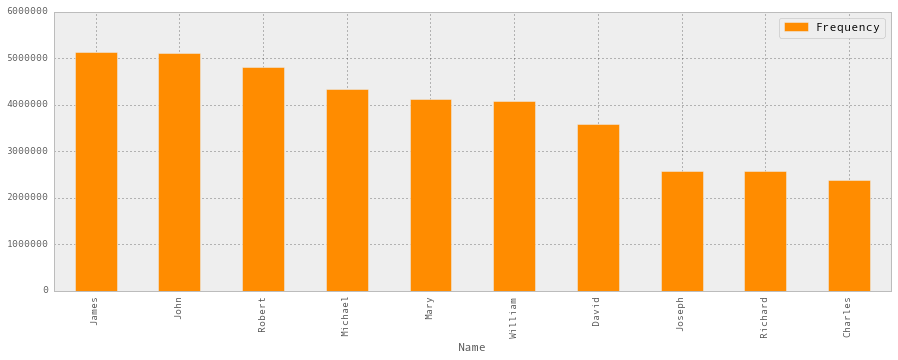

In [26]:
# Common unisex names

tmp = national_df.groupby(['Gender', 'Name']).agg({'Count': 'sum'}).reset_index()

male = (tmp.query("Gender == 'M'")
        .set_index("Name")
        .rename(columns={'Count': 'Male'}))

female = (tmp.query("Gender == 'F'")
          .set_index("Name")
          .rename(columns={'Count': 'Female'}))

join = male[['Male']].join(female[['Female']], how='inner')

join['Frequency'] = join['Male'] + join['Female']

join['FemalePercent'] = join['Female'] / join['Frequency'] * 100.0
join['MalePercent'] = join['Male'] / join['Frequency'] * 100.0

print (join[['Frequency', 'FemalePercent', 'MalePercent']]
.query('(FemalePercent > 10) & (MalePercent) > 10')
.sort_values('Frequency', ascending=False)
.head(10))

(join[['Frequency']]
.sort_values('Frequency', ascending=False)
.head(10).plot(kind='bar', color='darkorange'))

         Frequency  FemalePercent  MalePercent
Name                                          
Han           1000      50.100000    49.900000
Toryn          490      50.204082    49.795918
Skyeler        231      50.216450    49.783550
Miciah         454      50.220264    49.779736
Kodee          555      50.270270    49.729730


/Users/oksitosin/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':
/Users/oksitosin/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:5: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


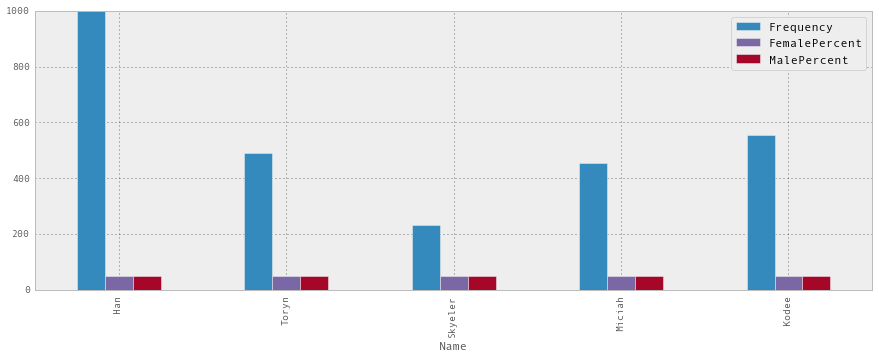

In [23]:
print join[['Frequency','FemalePercent','MalePercent']].query('FemalePercent > 50').sort('FemalePercent').head()

(join[['Frequency','FemalePercent','MalePercent']]
 .query('FemalePercent > 50')
 .sort('FemalePercent')
 .head().plot(kind='bar'))

##State Names

In [47]:
state_df = pd.read_csv('data/StateNames.csv')

In [48]:
print state_df.head(10)
print state_df.shape

   Id      Name  Year Gender State  Count
0   1      Mary  1910      F    AK     14
1   2     Annie  1910      F    AK     12
2   3      Anna  1910      F    AK     10
3   4  Margaret  1910      F    AK      8
4   5     Helen  1910      F    AK      7
5   6     Elsie  1910      F    AK      6
6   7      Lucy  1910      F    AK      6
7   8   Dorothy  1910      F    AK      5
8   9      Mary  1911      F    AK     12
9  10  Margaret  1911      F    AK      7
(5647426, 6)


['CA', 'NY', 'TX', 'PA', 'IL']


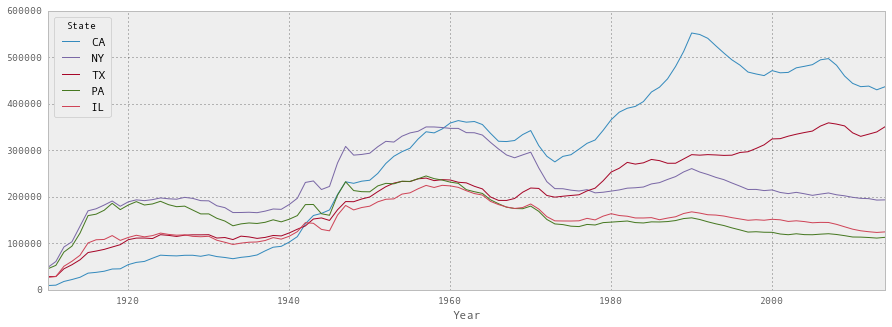

In [45]:
# Births in States

tmp2 = state_df.groupby(['Year', 'State']).agg({'Count': 'sum'}).reset_index()

birth_states = (tmp2.groupby('State')
                  .agg({'Count': 'sum'})
                  .sort_values('Count', ascending=False)
                  .index[:5].tolist())

print birth_states

tmp2.pivot(index='Year', columns='State', values='Count')[birth_states].plot()